# Analysis of Second Debate 2020

## Import packages

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.corpus import stopwords
from nltk import bigrams
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
import datetime
import plotly.graph_objects as go

## Read Data

In [2]:
second = pd.read_excel('Data_files/New_2nd_debate.xlsx')
second.head()

speaker    minute                                               text
0  Kristen Welker  00:00:09  Good evening, everyone. Good evening. Thank yo...
1    Donald Trump  00:01:02                                How are you doing? 
2       Joe Biden  00:01:05                                       How are you?
3  Kristen Welker  00:01:58  And I do want to say a very good evening to bo...
4  Kristen Welker  00:02:27  The goal is for you to hear each other and for...

In [3]:
null_df = pd.DataFrame(pd.concat([second.isnull().sum()], axis = 1))
null_df.columns = [ 'df']
null_df

df
speaker   0
minute    0
text      0

In [4]:
second.shape

(513, 3)

In [5]:
df_KW = second[second.speaker=='Kristen Welker']
df_JB = second[second.speaker=='Joe Biden']
df_DT = second[second.speaker=='Donald Trump']

In [6]:
df_KW

speaker    minute  \
0    Kristen Welker  00:00:09   
3    Kristen Welker  00:01:58   
4    Kristen Welker  00:02:27   
5    Kristen Welker  00:03:03   
9    Kristen Welker  00:05:06   
..              ...       ...   
499  Kristen Welker  01:29:23   
501  Kristen Welker  01:29:24   
504  Kristen Welker  01:29:30   
508  Kristen Welker  01:30:49   
511  Kristen Welker  01:31:53   

                                                  text  
0    Good evening, everyone. Good evening. Thank yo...  
3    And I do want to say a very good evening to bo...  
4    The goal is for you to hear each other and for...  
5     during this next stage of the coronavirus cri...  
9    Okay. Former Vice President Biden to you. How ...  
..                                                 ...  
499                      No, we're finished with this-  
501           We have to move onto our final question.  
504  All right. This is about leadership, gentlemen...  
508  All right. Vice President Biden, same question...  
511  All right, I want to thank you both for a very...  

[189 rows x 3 columns]

In [7]:
df_JB

speaker    minute                                               text
2    Joe Biden  00:01:05                                       How are you?
10   Joe Biden  00:05:13  220,000 Americans dead. You hear nothing else ...
11   Joe Biden  00:05:56  The expectation is we'll have another 200,000 ...
12   Joe Biden  00:06:19  What I would do is make sure we have everyone ...
13   Joe Biden  00:06:41  We're in a situation now where the New England...
..         ...       ...                                                ...
496  Joe Biden  01:29:07  He takes everything out of context, but the po...
502  Joe Biden  01:29:25  No, I'm going to rejoin Paris Accord and make ...
509  Joe Biden  01:30:57  I will say, I'm an American President. I repre...
510  Joe Biden  01:31:19  We can grow this economy, we can deal with the...
512  Joe Biden  01:32:16                                         Thank you.

[134 rows x 3 columns]

In [8]:
df_DT

speaker    minute                                               text
1    Donald Trump  00:01:02                                How are you doing? 
6    Donald Trump  00:03:04  So as you know, 2.2 million people modeled out...
7    Donald Trump  00:03:41  There was a very big spike in Texas. It's now ...
8    Donald Trump  00:04:04  I can tell you from personal experience, I was...
15   Donald Trump  00:07:13  No, it's not a guarantee, but it will be by th...
..            ...       ...                                                ...
500  Donald Trump  01:29:23                 Is he going to get China to do it?
503  Donald Trump  01:29:30                              [Crosstalk 00:24:31].
505  Donald Trump  01:29:47  We have to make our country totally successful...
506  Donald Trump  01:30:01  Before the plague came in, just before, I was ...
507  Donald Trump  01:30:28  Success is going to bring us together. We are ...

[190 rows x 3 columns]

In [9]:
print('Number of segments -  Kristen Welker            : ', df_KW.shape[0])
print('Number of segments - President Donald J. Trump : ', df_DT.shape[0])
print('Number of segments - Vice President Joe Biden  : ', df_JB.shape[0])

Number of segments -  Kristen Welker            :  189
Number of segments - President Donald J. Trump :  190
Number of segments - Vice President Joe Biden  :  134


In [10]:
# convert to strings
text_all = " ".join(str(txt) for txt in second.text)
text_KW = " ".join(txt for txt in df_KW.text)
text_DT = " ".join(txt for txt in df_DT.text)
text_JB = " ".join(txt for txt in df_JB.text)

# compare total text lengths
print('Length of text - All           : ', len(text_all))
print('Length of text -  	Kristen Welker        : ', len(text_KW))
print('Length of text - President Donald J. Trump : ', len(text_DT))
print('Length of text - Vice President Joe Biden  : ', len(text_JB))

Length of text - All           :  101134
Length of text -  	Kristen Welker        :  21554
Length of text - President Donald J. Trump :  40719
Length of text - Vice President Joe Biden  :  38859


## Word Cloud

In [11]:
stopwords = set(STOPWORDS)

In [12]:
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=500,
                      width = 600, height = 400,
                      background_color="white").generate(text_KW)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Donald Trump

In [13]:
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=500,
                      width = 600, height = 400,
                      background_color="white").generate(text_DT)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Joe Biden

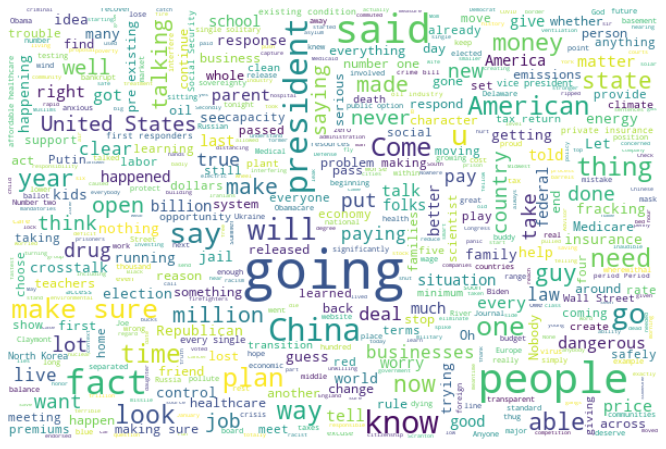

In [14]:
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=500,
                      width = 600, height = 400,
                      background_color="white").generate(text_JB)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Text Preparation

In [15]:
# standard stopwords
my_stopwords = set(nltk.corpus.stopwords.words('english'))
# additional stopwords
my_stopwords = my_stopwords.union({"'s","'ll","'re","n't","'ve","'m"})

In [16]:
# lower case
text_all = text_all.lower()
text_KW = text_KW.lower()
text_JB = text_JB.lower()
text_DT = text_DT.lower()

# tokenize text
words_all = nltk.word_tokenize(text_all)
words_KW = nltk.word_tokenize(text_KW)
words_JB = nltk.word_tokenize(text_JB)
words_DT = nltk.word_tokenize(text_DT)

# remove single characters
words_all = [word for word in words_all if len(word) > 1]
words_KW = [word for word in words_KW if len(word) > 1]
words_JB = [word for word in words_JB if len(word) > 1]
words_DT = [word for word in words_DT if len(word) > 1]

# remove stopwords
words_all = [word for word in words_all if word not in my_stopwords]
words_KW = [word for word in words_KW if word not in my_stopwords]
words_JB = [word for word in words_JB if word not in my_stopwords]
words_DT = [word for word in words_DT if word not in my_stopwords]

wordDictKW = dict.fromkeys(words_all, 0)
wordDictJB = dict.fromkeys(words_all, 0)
wordDictDT = dict.fromkeys(words_all, 0)

for word in words_KW:
    wordDictKW[word]+=1
for word in words_JB:
    wordDictJB[word]+=1
for word in words_DT:
    wordDictDT[word]+=1

## Term Frequency 

In [17]:
pd.DataFrame([wordDictKW, wordDictJB, wordDictDT])

good  evening  everyone  thank  much  honor  moderate  debate  tonight  \
0     4        4         3     10     2      2         1       7        8   
1     7        0         4      2     7      2         0       0        3   
2    14        0         1      1     7      0         0       0        1   

   final  ...  fiction  enormous  opportunities  systemic  motivated  decency  \
0     10  ...        0         0              0         0          0        0   
1      0  ...        1         2              2         1          1        1   
2      0  ...        0         0              0         0          0        0   

   treating  dignity  hosting  watching  
0         0        0        1         1  
1         1        1        0         0  
2         0        0        0         0  

[3 rows x 2146 columns]

In [18]:
def computeTF(wordDict, bow):
    tfDict = {}
    bowCount = len(bow)
    for word, count in wordDict.items():
        tfDict[word] = count / float(bowCount)
    return tfDict

def computeIDF(docList):
    import math
    idfDict = {}
    N = len(docList)
    
    #counts the number of documents that contain a word w
    idfDict = dict.fromkeys(docList[0].keys(),0)
    for doc in docList:
        for word, val in doc.items():
            if val > 0:
                idfDict[word] +=1
                
    #divide N by denominator above, take the log of that
    for word, val in idfDict.items():
        if val>0:
            idfDict[word]= math.log(N / float(val)) 

    return idfDict

def computeTFIDF(tfBow, idfs):
    tfidf = {}
    for word, val in tfBow.items():
        tfidf[word] = val * idfs[word]
    return tfidf

In [19]:
tfBowKW = computeTF(wordDictKW, words_KW)
tfBowJB = computeTF(wordDictJB, words_JB)
tfBowDT = computeTF(wordDictDT, words_DT)

idfs = computeIDF([wordDictKW, wordDictJB, wordDictDT])

tfidfBowKW =  computeTFIDF(tfBowKW, idfs)
tfidfBowJB = computeTFIDF(tfBowJB, idfs)
tfidfBowDT = computeTFIDF(tfBowDT, idfs)

## TFIDF

In [20]:
Second_debate_tfidf= pd.DataFrame([tfidfBowKW, tfidfBowJB,tfidfBowDT], index=['Kristen Welker', 'Joe Biden', 'Donload Trump'])
Second_debate_tfidf

good   evening  everyone  thank  much     honor  moderate  \
Kristen Welker   0.0  0.002282       0.0    0.0   0.0  0.000421   0.00057   
Joe Biden        0.0  0.000000       0.0    0.0   0.0  0.000253   0.00000   
Donload Trump    0.0  0.000000       0.0    0.0   0.0  0.000000   0.00000   

                  debate  tonight     final  ...   fiction  enormous  \
Kristen Welker  0.003993      0.0  0.005704  ...  0.000000  0.000000   
Joe Biden       0.000000      0.0  0.000000  ...  0.000343  0.000685   
Donload Trump   0.000000      0.0  0.000000  ...  0.000000  0.000000   

                opportunities  systemic  motivated   decency  treating  \
Kristen Welker       0.000000  0.000000   0.000000  0.000000  0.000000   
Joe Biden            0.000685  0.000343   0.000343  0.000343  0.000343   
Donload Trump        0.000000  0.000000   0.000000  0.000000  0.000000   

                 dignity  hosting  watching  
Kristen Welker  0.000000  0.00057   0.00057  
Joe Biden       0.000343  0.00000   0.00000  
Donload Trump   0.000000  0.00000   0.00000  

[3 rows x 2146 columns]

## Frequency of words and Bigram

In [21]:
# count word frequencies
word_freqs = nltk.FreqDist(words_KW)
# plot word frequencies
plt.rcParams['figure.figsize'] = [12, 6]
plt.title('Word Frequency - Kristen Welker')
word_freqs.plot(50)

<AxesSubplot:title={'center':'Word Frequency - Kristen Welker'}, xlabel='Samples', ylabel='Counts'>

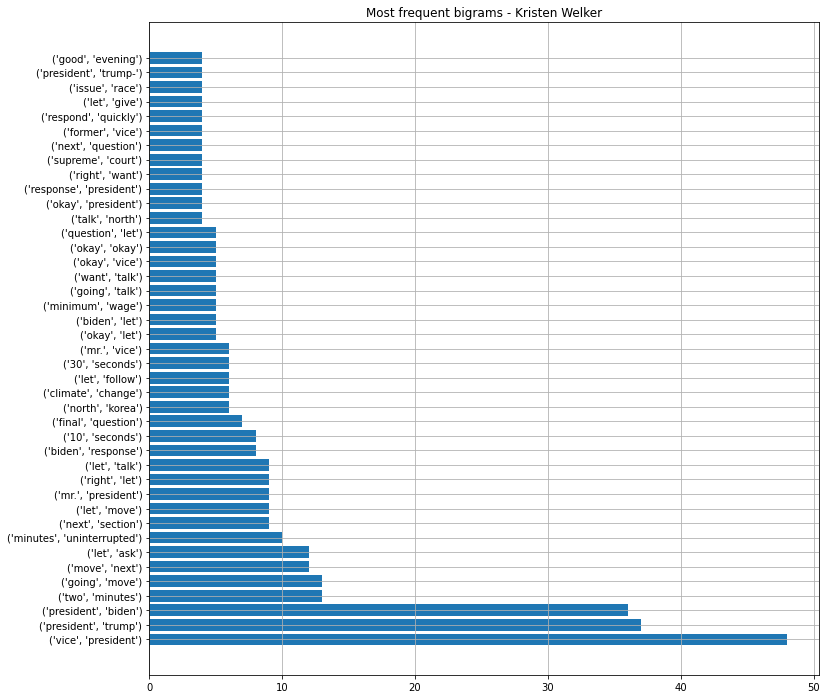

In [22]:
my_bigrams = bigrams(words_KW)
counts = Counter(my_bigrams)
counts = dict(counts)
# convert dictionary to data frame
dcounts = pd.DataFrame.from_dict(counts, orient='index', columns=['frequency'])
# select only bigrams occuring at least four times
dcounts = dcounts[dcounts.frequency>=4]
# and sort descending
dcounts = dcounts.sort_values(by='frequency', ascending=False)
plt.rcParams['figure.figsize'] = [12, 12]
plt.barh(list(map(str, dcounts.index)), dcounts.frequency)
plt.title('Most frequent bigrams - Kristen Welker')
plt.grid()
plt.show()

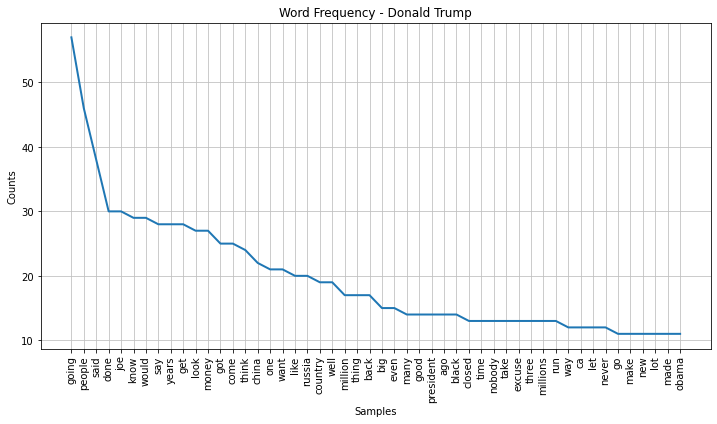

<AxesSubplot:title={'center':'Word Frequency - Donald Trump'}, xlabel='Samples', ylabel='Counts'>

In [23]:
# count word frequencies
word_freqs = nltk.FreqDist(words_DT)
# plot word frequencies
plt.rcParams['figure.figsize'] = [12, 6]
plt.title('Word Frequency - Donald Trump')
word_freqs.plot(50)

In [24]:
my_bigrams = bigrams(words_DT)
counts = Counter(my_bigrams)
counts = dict(counts)
# convert dictionary to data frame
dcounts = pd.DataFrame.from_dict(counts, orient='index', columns=['frequency'])
# select only bigrams occuring at least four times
dcounts = dcounts[dcounts.frequency>=4]
# and sort descending
dcounts = dcounts.sort_values(by='frequency', ascending=False)
plt.rcParams['figure.figsize'] = [12, 12]
plt.barh(list(map(str, dcounts.index)), dcounts.frequency)
plt.title('Most frequent bigrams - President Donald J. Trump')
plt.grid()
plt.show()

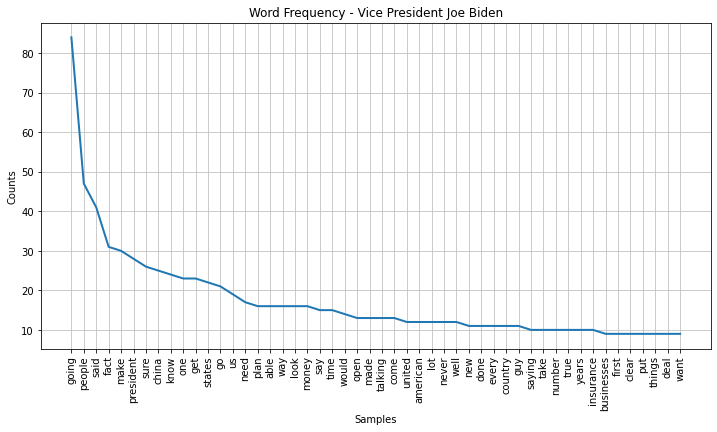

<AxesSubplot:title={'center':'Word Frequency - Vice President Joe Biden'}, xlabel='Samples', ylabel='Counts'>

In [25]:

word_freqs = nltk.FreqDist(words_JB)
# plot word frequencies
plt.rcParams['figure.figsize'] = [12, 6]
plt.title('Word Frequency - Vice President Joe Biden')
word_freqs.plot(50)

In [26]:
my_bigrams = bigrams(words_JB)
counts = Counter(my_bigrams)
counts = dict(counts)
# convert dictionary to data frame
dcounts = pd.DataFrame.from_dict(counts, orient='index', columns=['frequency'])
# select only bigrams occuring at least four times
dcounts = dcounts[dcounts.frequency>=4]
# and sort descending
dcounts = dcounts.sort_values(by='frequency', ascending=False)
plt.rcParams['figure.figsize'] = [12, 12]
plt.barh(list(map(str, dcounts.index)), dcounts.frequency)
plt.title('Most frequent bigrams - Vice President Joe Biden')
plt.grid()
plt.show()

## Sentiment Analysis

In [27]:
sia = SentimentIntensityAnalyzer()

In [28]:
sent = sia.polarity_scores(text_KW)
sent_val = sent['compound']
sent.pop('compound')
print('CW: sentiment score = ', sent_val)
print('CW: split = ', sent)

CW: sentiment score =  0.9996
CW: split =  {'neg': 0.047, 'neu': 0.843, 'pos': 0.109}


In [29]:
sent = sia.polarity_scores(text_DT)
sent_val = sent['compound']
sent.pop('compound')
print('DT: sentiment score = ', sent_val)
print('DT: split = ', sent)

DT: sentiment score =  0.9965
DT: split =  {'neg': 0.094, 'neu': 0.799, 'pos': 0.107}


In [30]:
sent = sia.polarity_scores(text_JB)
sent_val = sent['compound']
sent.pop('compound')
print('JB: sentiment score = ', sent_val)
print('JB: split = ', sent)

JB: sentiment score =  0.9994
JB: split =  {'neg': 0.077, 'neu': 0.819, 'pos': 0.104}


## Heatmap

In [31]:
null_df = pd.DataFrame(second.isnull().sum())
null_df.columns = [ 'second']
null_df

second
speaker       0
minute        0
text          0

In [32]:
# making the time consecutive


# Second Debate

second['seconds'] = 0 

for i, tm in enumerate(second.minute[1:],1):
    timeParts = [int(s) for s in str(tm).split(':')]
    
    # when we have hour like 01:10:50
    if (len(timeParts)>2) and (i<len(second)):
        
        current = (timeParts[0] * 60 + timeParts[1]) * 60 + timeParts[2]
        difference = current - second.loc[i-1, 'seconds']
        second.loc[i, 'seconds'] = second.loc[i-1, 'seconds'] + difference

#first['minutes'] = first.seconds.apply(lambda x:x//60)
second['minutes'] = second.seconds.apply(lambda x:x//60)

# We use this format of %h:%m:%s by using the following command
#first['time'] = first.seconds.apply(lambda x:str(datetime.timedelta(seconds=x)))
second['time'] = second.seconds.apply(lambda x:str(datetime.timedelta(seconds=x)))

In [33]:
second[:]

speaker    minute  \
0    Kristen Welker  00:00:09   
1      Donald Trump  00:01:02   
2         Joe Biden  00:01:05   
3    Kristen Welker  00:01:58   
4    Kristen Welker  00:02:27   
..              ...       ...   
508  Kristen Welker  01:30:49   
509       Joe Biden  01:30:57   
510       Joe Biden  01:31:19   
511  Kristen Welker  01:31:53   
512       Joe Biden  01:32:16   

                                                  text  seconds  minutes  \
0    Good evening, everyone. Good evening. Thank yo...        0        0   
1                                  How are you doing?        62        1   
2                                         How are you?       65        1   
3    And I do want to say a very good evening to bo...      118        1   
4    The goal is for you to hear each other and for...      147        2   
..                                                 ...      ...      ...   
508  All right. Vice President Biden, same question...     5449       90   
509  I will say, I'm an American President. I repre...     5457       90   
510  We can grow this economy, we can deal with the...     5479       91   
511  All right, I want to thank you both for a very...     5513       91   
512                                         Thank you.     5536       92   

        time  
0    0:00:00  
1    0:01:02  
2    0:01:05  
3    0:01:58  
4    0:02:27  
..       ...  
508  1:30:49  
509  1:30:57  
510  1:31:19  
511  1:31:53  
512  1:32:16  

[513 rows x 6 columns]

In [34]:
heat = second.groupby(['minutes', 'speaker']).count().reset_index()
fig = go.Figure(data=go.Heatmap(
        z=heat.minute,
        x=heat.minutes,
        y=heat.speaker,
        colorscale='Viridis_r',
        colorbar=dict(
        title="Heat of the discussion",
        titleside="top",
        tickmode="array",
        tickvals=[2, 5, 10],
        ticktext=["very cool", "normal", "Hot!"],
        ticks="outside"
    )
        ))

fig.update_layout(title='Second_debate_2020: # of times each one talks in each minute',
                 xaxis_nticks=36)

fig.show()